## Retrieve Images

In [3]:
from urllib import urlopen 
from urllib import urlretrieve
from bs4 import BeautifulSoup

link = "http://www.cs.toronto.edu/~vmnih/data/mass_roads/train/map/"

L = len("10378780_15.tif")

root = '/datasets/home/92/992/tal089/Labels/'

html = link + "index.html"

page = urlopen(html).read()  

source = BeautifulSoup(page, 'lxml') 

for text in source.find_all(['script', 'style']):
    text.decompose()   
T = source.get_text(strip=True)

List = []
for i in range(len(T)//L):
    S = ""
    for j in range(L):
        S += T[i*L+j]
    List.append(S)

#print(List)
t = 0
for name in List:
        t += 1
        print(str(t)+'/'+str(len(List)))
        
        urlretrieve(link+name, root+name)

1/1108
2/1108
3/1108
4/1108
5/1108
6/1108
7/1108
8/1108
9/1108
10/1108
11/1108
12/1108
13/1108
14/1108
15/1108
16/1108
17/1108
18/1108
19/1108
20/1108
21/1108
22/1108
23/1108
24/1108
25/1108
26/1108
27/1108
28/1108
29/1108
30/1108
31/1108
32/1108
33/1108
34/1108
35/1108
36/1108
37/1108
38/1108
39/1108
40/1108
41/1108
42/1108
43/1108
44/1108
45/1108
46/1108
47/1108
48/1108
49/1108
50/1108
51/1108
52/1108
53/1108
54/1108
55/1108
56/1108
57/1108
58/1108
59/1108
60/1108
61/1108
62/1108
63/1108
64/1108
65/1108
66/1108
67/1108
68/1108
69/1108
70/1108
71/1108
72/1108
73/1108
74/1108
75/1108
76/1108
77/1108
78/1108
79/1108
80/1108
81/1108
82/1108
83/1108
84/1108
85/1108
86/1108
87/1108
88/1108
89/1108
90/1108
91/1108
92/1108
93/1108
94/1108
95/1108
96/1108
97/1108
98/1108
99/1108
100/1108
101/1108
102/1108
103/1108
104/1108
105/1108
106/1108
107/1108
108/1108
109/1108
110/1108
111/1108
112/1108
113/1108
114/1108
115/1108
116/1108
117/1108
118/1108
119/1108
120/1108
121/1108
122/1108
123/1108
1

924/1108
925/1108
926/1108
927/1108
928/1108
929/1108
930/1108
931/1108
932/1108
933/1108
934/1108
935/1108
936/1108
937/1108
938/1108
939/1108
940/1108
941/1108
942/1108
943/1108
944/1108
945/1108
946/1108
947/1108
948/1108
949/1108
950/1108
951/1108
952/1108
953/1108
954/1108
955/1108
956/1108
957/1108
958/1108
959/1108
960/1108
961/1108
962/1108
963/1108
964/1108
965/1108
966/1108
967/1108
968/1108
969/1108
970/1108
971/1108
972/1108
973/1108
974/1108
975/1108
976/1108
977/1108
978/1108
979/1108
980/1108
981/1108
982/1108
983/1108
984/1108
985/1108
986/1108
987/1108
988/1108
989/1108
990/1108
991/1108
992/1108
993/1108
994/1108
995/1108
996/1108
997/1108
998/1108
999/1108
1000/1108
1001/1108
1002/1108
1003/1108
1004/1108
1005/1108
1006/1108
1007/1108
1008/1108
1009/1108
1010/1108
1011/1108
1012/1108
1013/1108
1014/1108
1015/1108
1016/1108
1017/1108
1018/1108
1019/1108
1020/1108
1021/1108
1022/1108
1023/1108
1024/1108
1025/1108
1026/1108
1027/1108
1028/1108
1029/1108
1030/1108
1031/1

# Initiate the environment 

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from random import randint
from glob import glob
import os
import os.path
import scipy
import math
%matplotlib inline

import tensorflow as tf
print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
print('TensorFlow Version: {}'.format(tf.__version__))

/opt/conda/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Default GPU Device: /device:GPU:0
TensorFlow Version: 1.4.0-rc1


In [2]:
#useful variables
num_classes = 3 # none and 12 options, 0-12
image_shape = (160, 576)
# image_shape = (576, 160)
weights_initializer_stddev = 0.01
weights_regularized_l2 = 1e-3

## Download VGG16

In [3]:
from urllib import urlretrieve
import zipfile

if not os.path.exists("vgg16.zip"):
    urlretrieve(
        'https://s3-us-west-1.amazonaws.com/udacity-selfdrivingcar/vgg.zip',
        "./vgg16.zip")
    print("Downloaded VGG16 model weights")
else:
    print("Already exists, skipping download")

Already exists, skipping download


In [4]:
import zipfile
with zipfile.ZipFile('/datasets/home/92/992/tal089/vgg16.zip', 'r') as zip_ref:    #type your won path here
    zip_ref.extractall('/datasets/home/92/992/tal089/vgg16')

## Helper Function

In [3]:
# Unfortunately We did not figure out a way to succesfully get the truthmap we desired for trianing with those functions that 
# which cause corrpution of our training results we wish we would have more knowledge of semantic image segementation
def imageToTruth(img): 
    return [list(map(pixelToTruth, row)) for row in img]        

def truthToImage(truth):
    return [list(map(truthToPixel, row)) for row in truth]
def truthToPixel(value):
    tmp = value.tolist()
    return (tmp.index(max(tmp)), 0, 0)

In [4]:
# This function is supposed to do the truth map generating 
def pixelToTruth(value):
   
    if value<85:
        return (0, 1, 0)
    elif value>85 & value<170:
        return (0, 0, 1)
    else:
        return (1, 0, 0)

## Get the image files

In [5]:
# This function grab data from local folder and feed them into truth map generating function. Then generate batches for training
def get_training_data(batch_size):

     
    image_paths = glob(os.path.join("./Images", "*.tiff"))
    label_paths = glob(os.path.join("./Labels", "*.tif"))
    for batch in range(0, len(image_paths), batch_size):
        images = []
        maps = []
    
    for batch in range(0, len(image_paths), batch_size):
        images = []
        maps = []
        
        for index, image_file in enumerate(image_paths[batch:batch + batch_size]):
            map_file = os.path.join(label_paths[index])
            image = scipy.misc.imread(image_file)
            image = scipy.misc.imresize(image, image_shape)
            map_image = scipy.misc.imread(map_file)
            map_image = scipy.misc.imresize(map_image, image_shape)
            map_image = imageToTruth(map_image)
            
            images.append(image)
            maps.append(map_image)

        yield np.array(images), np.array(maps)

In [7]:
model = {}

In [8]:
def get_placeholders(model):
    model['placeholders'] = {}
    
    #Those are Placeholders
    model['placeholders']['label'] = tf.placeholder(tf.int32, (None, image_shape[0], image_shape[1], model['settings']['num_classes']), name='label')
    model['placeholders']['learning_rate'] = tf.placeholder(tf.float32, name='learning_rate')

## Load VGG

In [9]:
def load_vgg(model):
    #Grab layers from pretrained VGG
    tf.saved_model.loader.load(sess, ["vgg16"], '/datasets/home/92/992/tal089/vgg16/vgg'   #type your own path here
)
    
    model['graph'] = tf.get_default_graph()
    
    #define key layers to take infromation from VGG
    model['input_layer'] = model['graph'].get_tensor_by_name("image_input:0")
    model['keep_prob'] = model['graph'].get_tensor_by_name("keep_prob:0") #Dropout settings
    
    #grab more layers from vgg to backfeed into our fcn 
    model['layer_3'] = model['graph'].get_tensor_by_name("layer3_out:0")
    model['layer_4'] = model['graph'].get_tensor_by_name("layer4_out:0")
    model['layer_7'] = model['graph'].get_tensor_by_name("layer7_out:0")

In [12]:
def vgg_fcn(model):
    # Skip connections for later
    model['skip_conv_3'] = tf.layers.conv2d(model['layer_3'], model['settings']['num_classes'], 1, padding='same',
            kernel_initializer = tf.random_normal_initializer(stddev=weights_initializer_stddev),
            kernel_regularizer= tf.contrib.layers.l2_regularizer(weights_regularized_l2),
            name='skip_conv_3')
    
    model['skip_conv_4'] = tf.layers.conv2d(model['layer_4'], model['settings']['num_classes'], 1, padding='same',
            kernel_initializer = tf.random_normal_initializer(stddev=weights_initializer_stddev),
            kernel_regularizer= tf.contrib.layers.l2_regularizer(weights_regularized_l2),
            name='skip_conv_4')
    
    #Layer 7 isn't skipped, it's passed right to transpose    
    model['fully_connected_convs'] = tf.layers.conv2d(model['layer_7'], model['settings']['num_classes'], 1, padding='same',
            kernel_initializer = tf.random_normal_initializer(stddev=weights_initializer_stddev),
            kernel_regularizer= tf.contrib.layers.l2_regularizer(weights_regularized_l2),
            name='fully_connected_convs')
    
    
    #From layer 7 we need to transpose up
    model['transpose_1'] = tf.layers.conv2d_transpose(model['fully_connected_convs'], model['settings']['num_classes'], 4, 2, padding='same',
            kernel_initializer = tf.random_normal_initializer(stddev=weights_initializer_stddev),
            kernel_regularizer= tf.contrib.layers.l2_regularizer(weights_regularized_l2),
            name='transpose_1')
    
    # Add the skip layer from layer 4
    model['skip_1'] = tf.add(model['transpose_1'], model['skip_conv_4'], name='skip_1')
    
    #Tranpose up from resultant layer
    model['transpose_2'] = tf.layers.conv2d_transpose(model['skip_1'], model['settings']['num_classes'], 4, 2, padding='same',
            kernel_initializer = tf.random_normal_initializer(stddev=weights_initializer_stddev),
            kernel_regularizer= tf.contrib.layers.l2_regularizer(weights_regularized_l2),
            name='transpose_2')
    
    #Create skip layer from layer 3
    model['skip_2'] = tf.add(model['skip_conv_3'], model['transpose_2'], name='skip_2')
    
    #Final output layer
    model['output_layer'] = tf.layers.conv2d_transpose(model['skip_2'], model['settings']['num_classes'], 16, 8, padding='same',
            kernel_initializer = tf.random_normal_initializer(stddev=weights_initializer_stddev),
            kernel_regularizer= tf.contrib.layers.l2_regularizer(weights_regularized_l2),
            activation=tf.sigmoid, name='output_layer')
    
    return model['output_layer']

In [13]:
def get_logits(model):
    model['logits'] = {}
    
    #optimzer
    model['logits']['logits'] = tf.reshape(model['output_layer'], (-1, model['settings']['num_classes']))
    model['logits']['correct_label'] = tf.reshape(model['placeholders']['label'], (-1, model['settings']['num_classes']))

In [14]:
def get_loss(model):
    model['loss'] = {}

    model['loss']['softmax'] = tf.nn.softmax_cross_entropy_with_logits(logits=model['logits']['logits'], labels=model['logits']['correct_label'])
    model['loss']['cross_entropy_loss'] = tf.reduce_mean(model['loss']['softmax'])
    model['loss']['optimizer'] = tf.train.AdamOptimizer(learning_rate=model['placeholders']['learning_rate'])
    model['loss']['train_op'] = model['loss']['optimizer'].minimize(model['loss']['cross_entropy_loss'])

In [16]:
def train(sess, model, epochs=1, batch_size=10, keep_probability=0.5, learning_rate_alpha=0.001):
    
    sess.run(tf.global_variables_initializer())
    
    print("launching training")
    
    for epoch in range(epochs):
        print("Launching Epoch {}".format(epoch))
        loss_log = []
        batch_count = 0
        
        for image, truth in get_training_data(batch_size):
            print("")
            batch_count += 1
            loss = sess.run(
                    [model['loss']['train_op'], model['loss']['cross_entropy_loss']],
                    feed_dict = {
                        model['input_layer']: image,
                        model['placeholders']['label']: truth,
                        model['keep_prob']: keep_probability,
                        model['placeholders']['learning_rate']: learning_rate_alpha
                                },
                              )
            print("loss is ",loss)
            loss_log.append('{:3f}'.format(loss[1]))
            if(batch_count % 10 == 0):
                print("Batch {} - loss of {}".format(batch_count, loss))
        print("Training for epoch finished - ", loss_log)
        
        chkpt_path = "check_point/fcn_model".format(epoch)
        saver.save(sess, chkpt_path)
        print("Model saved as {}".format(chkpt_path))
        print()
    print("Training finished")

In [ ]:
saver = None

tf.reset_default_graph()

with tf.Session() as sess:
    
    model = {}
    model['settings'] = { "num_classes": 3 }
    get_placeholders(model)
    load_vgg(model)
    vgg_fcn(model)
    get_logits(model)
    get_loss(model)
    
    saver = tf.train.Saver()
 
    train(sess, model, 10, 10, 0.5, 0.002)

INFO:tensorflow:Restoring parameters from /datasets/home/92/992/tal089/vgg16/vgg/variables/variables
launching training
Launching Epoch 0


/opt/conda/lib/python2.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/opt/conda/lib/python2.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
/opt/conda/lib/python2.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/opt/conda/lib/python2.7/site-packages/ipykernel_launcher.py:20: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.



('loss is ', [None, 1.1548898])

('loss is ', [None, 1.1695944])

('loss is ', [None, 0.9283353])

('loss is ', [None, 0.7938075])

('loss is ', [None, 0.75421286])

('loss is ', [None, 0.7267935])

('loss is ', [None, 0.7034591])

('loss is ', [None, 0.68131125])

('loss is ', [None, 0.6693761])

('loss is ', [None, 0.65710306])
Batch 10 - loss of [None, 0.65710306]

('loss is ', [None, 0.64676315])

('loss is ', [None, 0.6424768])

('loss is ', [None, 0.63908094])

('loss is ', [None, 0.636603])

('loss is ', [None, 0.63549924])

('loss is ', [None, 0.63394505])

('loss is ', [None, 0.633237])

('loss is ', [None, 0.632735])

('loss is ', [None, 0.6324973])

('loss is ', [None, 0.6317027])
Batch 20 - loss of [None, 0.6317027]

('loss is ', [None, 0.6304832])

('loss is ', [None, 0.6300404])

('loss is ', [None, 0.6299115])

('loss is ', [None, 0.62983453])

('loss is ', [None, 0.629749])

('loss is ', [None, 0.62969416])

('loss is ', [None, 0.6296487])

('loss is ', [None, 0.629612

In [78]:
def execute_on_image(sess, model):

    image_file = "10078660_15-Copy1.tiff"
    truth_file = "10078660_15-Copy1.tif"
    
    image = scipy.misc.imread(image_file)
    image = scipy.misc.imresize(image, image_shape)
    plt.figure(figsize=(20,15))
    plt.imshow(image)
    truth = scipy.misc.imread(truth_file)
    truth = scipy.misc.imresize(truth, image_shape)
   
    plt.figure(figsize=(20,15))
    plt.imshow(colorizeMap(truth))
    truth = imageToTruth(truth)
    
    output = sess.run(model["output_layer"], feed_dict={
            model["input_layer"]: [image],
            model['placeholders']['label'] : [truth],
            "keep_prob:0": 1.0,
            model["placeholders"]["learning_rate"] : 0.01
        })
    output = output[0]
    
    plt.figure(figsize=(20,15))
    outputImage = truthToImage(output)
    colorizedOutput = colorizeMap(outputImage)
    plt.imshow(outputImage)
    
    return output

## Execute on image

INFO:tensorflow:Restoring parameters from /datasets/home/92/992/tal089/vgg16/vgg/variables/variables
INFO:tensorflow:Restoring parameters from check_point/fcn_model


/opt/conda/lib/python2.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
/opt/conda/lib/python2.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  import sys
/opt/conda/lib/python2.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  del sys.path[0]
/opt/conda/lib/python2.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


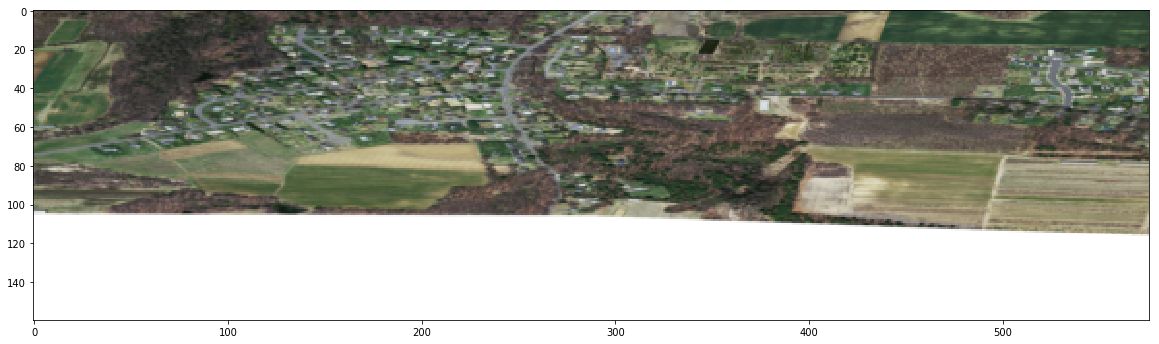

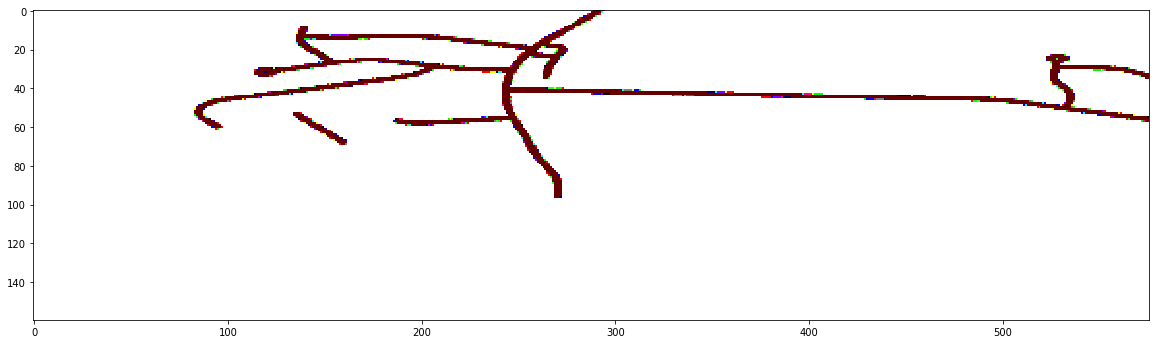

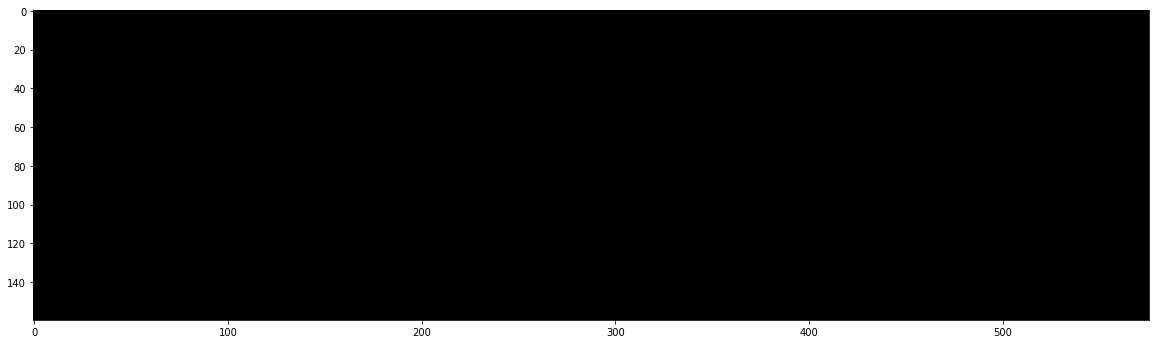

In [79]:
tf.reset_default_graph()
with tf.Session() as sess:
    model = {}
    model['settings'] = { "num_classes": 3 }
    get_placeholders(model)
    load_vgg(model)
    vgg_fcn(model)
    get_logits(model)
    get_loss(model)
    
    saver = tf.train.Saver()

    saver.restore(sess, "check_point/fcn_model")
    
    results = execute_on_image(sess, model)